# Netflix Data Analysis

Acest proiect analizează dataset-ul "Netflix Movies and TV Shows" pentru a descoperi tipuri de conținut, distribuția pe țări și evoluția titlurilor în timp.

**Librării folosite:** pandas, numpy, matplotlib, seaborn  
**Obiectiv:** să obținem insight-uri simple, dar clare, despre conținutul Netflix.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
sns.set(style="whitegrid")
%matplotlib inline

In [23]:
# Incarcare date
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [25]:
df.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [26]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [27]:
# Eliminare duplicate
df.drop_duplicates(inplace=True)

# Curățare și conversie dată
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

# Extragem anul adăugării
df['year_added'] = df['date_added'].dt.year

In [28]:
# Filme vs Serial
print(df['type'].value_counts())

# Top 10 țări cu cele mai multe titluri
print(df['country'].value_counts().head(10))

# Număr titluri adăugate pe ani
print(df['year_added'].value_counts().sort_index())

type
Movie      5377
TV Show    2410
Name: count, dtype: int64
country
United States     2555
India              923
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Mexico             100
Name: count, dtype: int64
year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      25
2015.0      88
2016.0     443
2017.0    1225
2018.0    1685
2019.0    2153
2020.0    2009
2021.0     117
Name: count, dtype: int64


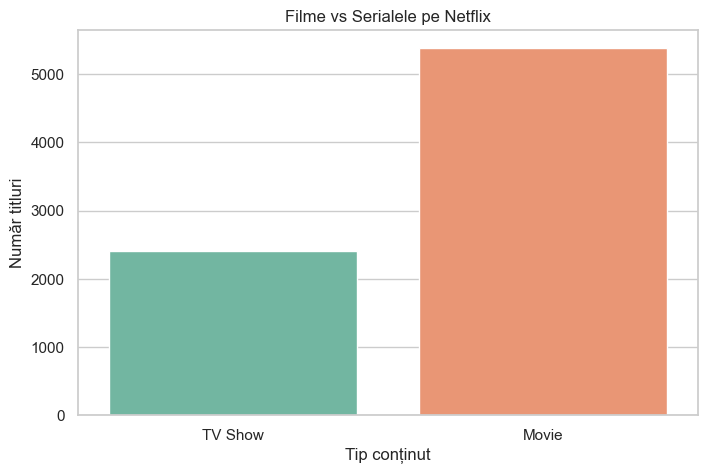

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='type', hue='type', palette='Set2', legend=False)
plt.title("Filme vs Serialele pe Netflix")
plt.xlabel("Tip conținut")
plt.ylabel("Număr titluri")
plt.show()

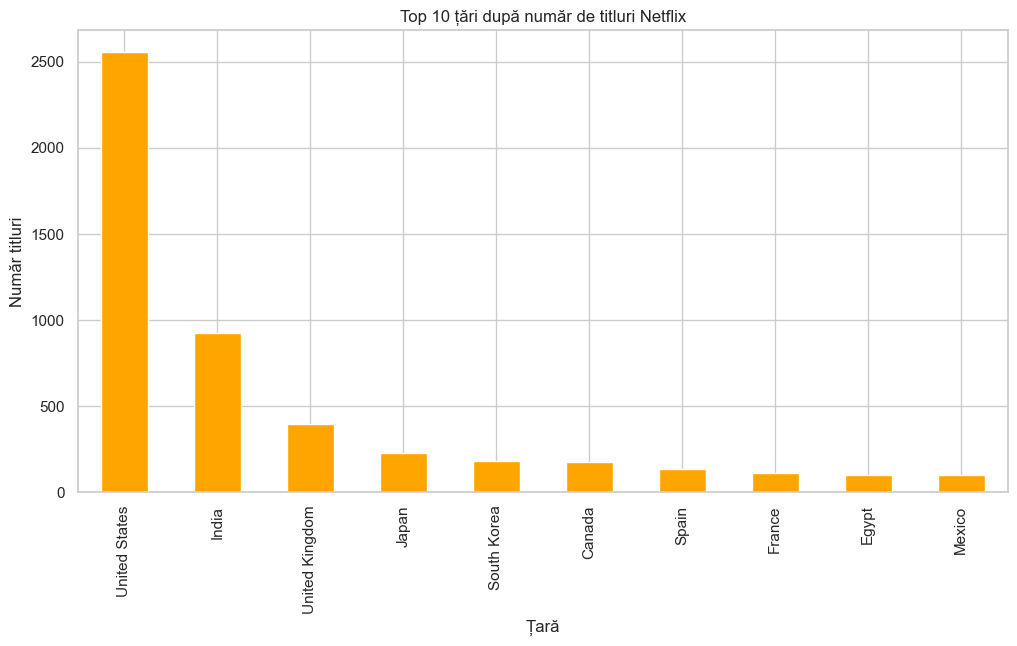

In [32]:
plt.figure(figsize=(12,6))
df['country'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 țări după număr de titluri Netflix")
plt.xlabel("Țară")
plt.ylabel("Număr titluri")
plt.show()

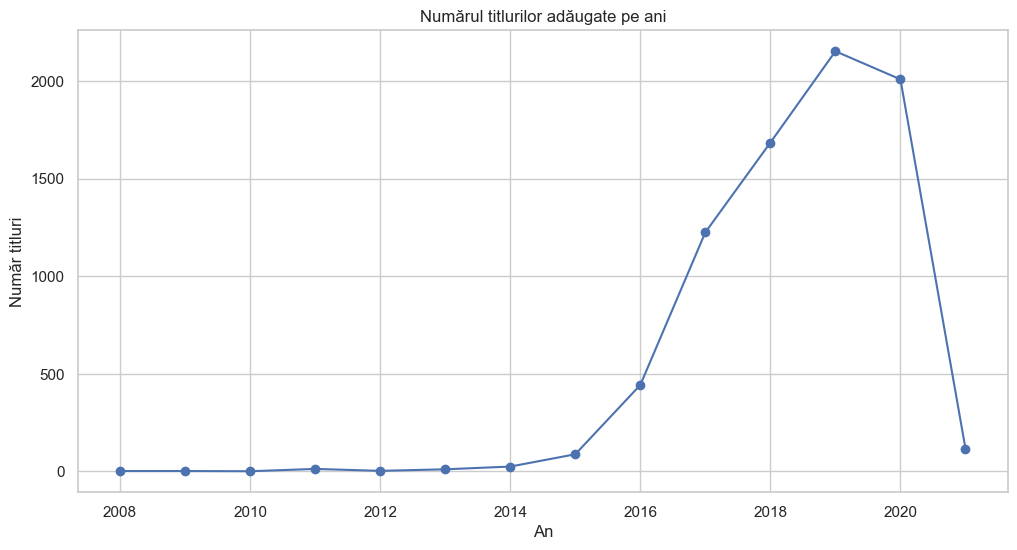

In [33]:
plt.figure(figsize=(12,6))
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Numărul titlurilor adăugate pe ani")
plt.xlabel("An")
plt.ylabel("Număr titluri")
plt.show()

In [34]:
# Media anilor adăugării (ignora valorile lipsă)
mean_year = np.nanmean(df['year_added'])
print(f"Anul mediu de adăugare a titlurilor este: {mean_year:.0f}")

Anul mediu de adăugare a titlurilor este: 2018
